# Calculating Sharpe Ratio for Long-Only Vs Market Neutral Strategies

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

# First part of example

In [4]:
df=pd.read_excel('IGE.xls')

In [5]:
df.sort_values(by='Date', inplace=True)

In [6]:
dailyret=df.loc[:, 'Adj Close'].pct_change() # daily returns

In [7]:
excessRet=dailyret-0.04/252 #  excess daily returns = strategy returns - financing cost, assuming risk-free rate of 

In [8]:
sharpeRatio=np.sqrt(252)*np.mean(excessRet)/np.std(excessRet)

In [9]:
sharpeRatio

np.float64(0.7895802501305731)

# Second part of example

In [10]:
df2=pd.read_excel('SPY.xls')

In [11]:
df=pd.merge(df, df2, on='Date', suffixes=('_IGE', '_SPY'))

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.set_index('Date', inplace=True)

In [14]:
df.sort_index(inplace=True)

In [15]:
dailyret=df[['Adj Close_IGE', 'Adj Close_SPY']].pct_change() # daily returns

In [16]:
dailyret.rename(columns={"Adj Close_IGE": "IGE", "Adj Close_SPY": "SPY"}, inplace=True)

In [17]:
netRet=(dailyret['IGE']-dailyret['SPY'])/2

In [18]:
sharpeRatio=np.sqrt(252)*np.mean(netRet)/np.std(netRet)

In [19]:
sharpeRatio

np.float64(0.7839419359681374)

In [20]:
cumret=np.cumprod(1+netRet)-1

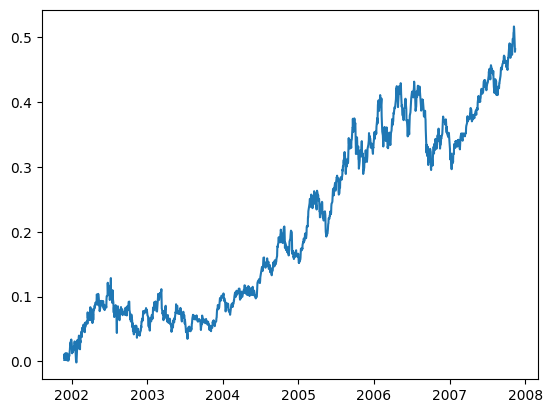

In [24]:
plt.plot(cumret)

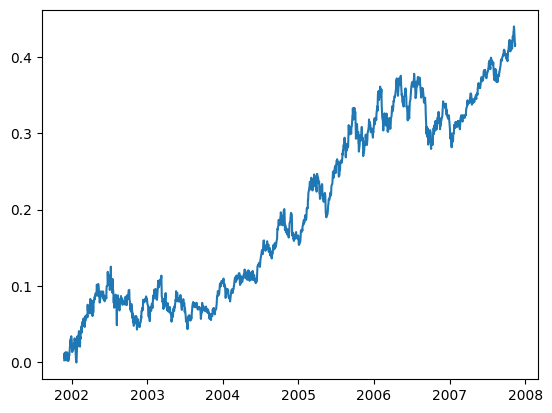

In [26]:
plt.plot(np.cumsum(netRet))

In [22]:
from calculateMaxDD import calculateMaxDD

In [23]:
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cumret.values)

In [24]:
maxDrawdown

-0.09529268047208683

In [25]:
maxDrawdownDuration

497.0

In [26]:
startDrawdownDay

1223